# Homework04

Some exercises with image files and pixel arrays.

## Goals

- Even more practice with lists
- Practice with image _feature extraction_
- Get familiar with computer vision techniques and terminology
- Set up another simple classifier model with an evaluation function

### Import helpers

Run the following 2 cells to import helper functions, files and libraries

In [ ]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/image_utils.py

!wget -qO- https://github.com/PSAM-5020-2025S-A/5020-utils/releases/latest/download/forest-tree.tar.gz | tar xz

In [ ]:
import PIL.Image as PImage

from os import listdir, path
from random import choice

from image_utils import get_pixels, make_image, edges
from Homework04_utils import Homework04Utils

### Review

We can use the `PImage.open()` function to open image files.

Then we can use the `size` variable to get their size and the `getbands()` function to get the number of channels.

The built-in jupyter function `display()` draws our image on the notebook.

In [ ]:
mimg = PImage.open("./data/image/secrets/secret_01.png")

image_width, image_height = mimg.size

print(image_width, "x", image_height)
print("total number of pixels:", image_width * image_height)
print("number of channels:", len(mimg.getbands()))

display(mimg)

### Getting pixel color lists

The `get_pixels()` function can be used to get a list of pixel color values that we can iterate over.

In [ ]:
mpxs = get_pixels(mimg)

print(len(mpxs))
print(mpxs[0])

Ok, now for the actual homework...

## Pixel Manipulation

Let's open `./data/image/secrets/secret_00.png` again using these methods and take a closer look at the image.

In [ ]:
mimg01 = PImage.open("./data/image/secrets/secret_01.png")
mpxs01 = get_pixels(mimg01)

print(len(mpxs01))
print(mpxs01[0])

display(mimg01)

### Hmmm 🤔... 

It looks like there might be overlapping messages here, but the colors of the text got "mixed".

### Exercise 01

Let's take a look at the values of the first color channel.

We'll have to go through the list of pixels and grab just the first value from each pixel.

Then create a single-channel image from these values and take a look.

#### Note:

Since we're opening `png` files with a transparency layer, our images have $4$ channels. That's why we're destructuring our pixels into `(r,g,b,a)`.

In [ ]:
# Work on exercise 01 here

red_pxs01 = []
for r,g,b,a in mpxs01:
    red_pxs01.append((r, 0, 0))
  
  # only append the red value to our new list
  #print("TODO: figure out what/when to append to red_pxs and remove this message")


### Check Exercise 01

Run this cell to see the new image created from the red channel of the original image.

In [ ]:
red_img01 = make_image(red_pxs01)
display(red_img01)

### Image 02

Here's the second image:

In [ ]:
mimg02 = PImage.open("./data/image/secrets/secret_02.png")
mpxs02 = get_pixels(mimg02)
display(mimg02)

### Exercise 02

Let's take a look at all of its channels separately.

We'll have to go through the list of pixels and put each color value from each pixel into a separate list.

Then create single-channel images from these lists and take a look.

In [ ]:
# Work on exercise 02 here

red_pxs02 = []
green_pxs02 = []
blue_pxs02 = []

for r,g,b,a in mpxs02:
  # append the channel values to the corresponding list
  red_pxs02.append((r, 0,0,a))
  green_pxs02.append((0, g,0,a))
  blue_pxs02.append((0,0,b,a))
  #print("TODO: figure out what/when to append to the arrays above and remove this message")


### Check Exercise 02

Run this cell to see the new images created from each channel of the original image.

In [ ]:
red_img02 = make_image(red_pxs02, mimg02.size[0])
green_img02 = make_image(green_pxs02, mimg02.size[0])
blue_img02 = make_image(blue_pxs02, mimg02.size[0])

display(red_img02)
display(green_img02)
display(blue_img02)

### Image 03

And here's the next image:

In [ ]:
mimg03 = PImage.open("./data/image/secrets/secret_03.png")
mpxs03 = get_pixels(mimg03)
display(mimg03)

### Exercise 03

Just like with the previous image, let's take a look at all of the channels separately.

We'll have to go through the list of pixels and put each color value from each pixel into a separate list.

Then create single-channel images from these lists and take a look.

In [ ]:
# Work on exercise 03 here
# the code from exercise 02 might just work

red_pxs03 = []
green_pxs03 = []
blue_pxs03 = []

for r,g,b,a in mpxs03:
  red_pxs03.append((r, 0,0,a))
  green_pxs03.append((0,g,0,b))
  blue_pxs03.append((0,0,b,a))
  # append the channel values to the corresponding list
  #print("TODO: figure out what/when to append to the arrays and remove this message")


### Check Exercise 03

Run this cell to see the new images created from each channel of the original image.

In [ ]:
red_img03 = make_image(red_pxs03)
green_img03 = make_image(green_pxs03)
blue_img03 = make_image(blue_pxs03)

display(red_img03)
display(green_img03)
display(blue_img03)

### Image 04

Here's the next image:

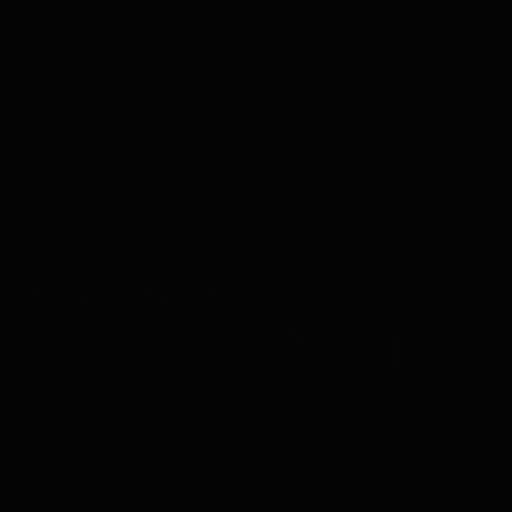

In [48]:
mimg04 = PImage.open("./data/image/secrets/secret_04.png")
mpxs04 = get_pixels(mimg04)
display(mimg04)

### Exercise 04

What ?!?

Well... the previous image gave some hints.

The "above average" bit could mean we have to look at pixels that are above the average value for each channel.

Let's start by getting a list of the red channel values, then we can calculate their average and look at the pixels that are above this average value.

Then we'll go through the pixels and when we find a pixel with a red value above the average we'll just saturate that pixel by setting it to $255$.

In [57]:
# Work on exercise 04

red_pxs04 = []
for r,g,b,a in mpxs04:
  red_pxs04.append((r))
  # append the channel value to the new list
  #print("TODO: figure out what/when to append to red_pxs and remove this message")

# calculate the average value of red pixels
red_avg = sum(red_pxs04) / len(red_pxs04)

print(red_avg)
  

red_pxs_above_avg = []
for r,g,b,a in mpxs04:
  if r > red_avg:
    red_pxs_above_avg.append((r*10, 255,255,a))

  # saturate the pixels that are above the channel average
  #print("TODO: figure out what/when to append to red_pxs_above_avg and remove this message")


4.03387451171875


### Check Exercise 04

Run this cell to see the new images created from the red channel of the original image.

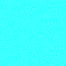

In [58]:
red_img04 = make_image(red_pxs_above_avg)
display(red_img04)

### Finish Exercise 04

If the previous strategy worked for one channel, repeat it for all 3.

Find the average of each channel, then go through the image and if any of the channels are above their average value, saturate that pixel to $255$.

In [ ]:
# Finish exercise 04

red_pxs04 = []
green_pxs04 = []
blue_pxs04 = []

for r,g,b,a in mpxs04:
  # append the channel value to the right list
  print("TODO: figure out what/when to append to the r,g,b arrays and remove this message")

# calculate the average value of each channel
red_avg = 0
green_avg = 0
blue_avg = 0

above_avg_pxs = []

for r,g,b,a in mpxs04:
  # saturate the pixels that are above the channel average
  print("TODO: figure out what/when to append to above_avg_pxs and remove this message")


### Check Exercise 04

Run this cell to see the new images created by marking above average pixels in the original image.

In [ ]:
above_avg_img = make_image(above_avg_pxs)
display(above_avg_img)

### Image 05

Here's the next image:

In [ ]:
mimg05 = PImage.open("./data/image/secrets/secret_05.png")
mpxs05 = get_pixels(mimg05)
display(mimg05)

### Exercise 05

Let's just follow the instructions from the previous image and read the specified pixels.

In [ ]:
# Work on exercise 05

smaller_pxs = []
for i, p in enumerate(mpxs05):
  # append the pixel to our image based on its index
  print("TODO: figure out what/when to append to smaller_pxs and remove this message")


### Check Exercise 05

Run this cell to see the new image created from some of the pixels from the original image.

Since we want to use a pixel array to create an image with different dimensions for `width` and `height`, we have to use `make_image(pxs, width, height)`.

In [ ]:
smaller_new_img = make_image(smaller_pxs)
display(smaller_new_img)

### Image 06

In [ ]:
mimg06 = PImage.open("./data/image/secrets/secret_06.png")
mpxs06 = get_pixels(mimg06)
display(mimg06)

### Exercise 06

Here we have to use `make_image(pxs, width, height)` with correct values for the `width` and `height` parameters.

Let's start by checking the dimensions of this image and doing some math to see how to make it a square.

##### Reminder:

The `width` and `height` of a square image are equal. So:

$number\ of\ pixels = width\ \times height\\
\textcolor{transparent}{number\ of\ pixels} = width\ \times width\\
\textcolor{transparent}{number\ of\ pixels} = height \times height$

$\sqrt{x}$ is the same thing as $x^{0.5}$, and in python we can do that with: `x ** 0.5`.

In [ ]:
# Work on exercise 06

# current dimensions
img_width, img_height = mimg06.size

total_pixels = 0 # TODO: fill this in

new_width = 0 # TODO: fill this in
new_height = 0 # TODO: fill this in


### Check Exercise 06

Run this cell to see the fixed image.

In [ ]:
fixed_img = make_image(mpxs06, new_width, new_height)
display(fixed_img)

### Image 07

In [ ]:
mimg07 = PImage.open("./data/image/secrets/secret_07.png")
mpxs07 = get_pixels(mimg07)
display(mimg07)

### Exercise 07

Steganography is the practice of hiding information within another piece of information.

One technique for doing this with images uses something called *bitmasking* and *bit shifting* on individual pixel values. What this means is that we can use each pixel value of the image to hold information about $2$ images, but in a way that isn't as obvious as some of the previous methods we looked at so far.

Basically, we end up storing $2$ numbers in a place where there should only be one.

How ?

Let's pretend we have the numbers $1242$ and $2664$ and we want to store both of them, but only using $4$ digits.

One way we can do that is by first rounding the numbers to the nearest $100$, creating numbers that only use two digits ($1200$ and $2700$), and then combining these into a single 4-digit number, $1227$.

We can undo this transformation to get back the numbers $1200$ and $2700$, which aren't exactly $1242$ and $2664$, but are close enough.

Doing this with pixel values is similar, but we have to work with the individual bit values of each color, for every pixel.

### With bits

In the example above, to recover the number $2700$ from $1227$ we first get the remainder from diving $1227$ by $100$ and then multiply that by $100$.

For our "*3 lowest bits*" steganography it's similar, but with different values. What we want to do to each color value is first get the remainder of a division by $8$ and then multiply that by $32$.

In [ ]:
# Work on exercise 07

decoded_pxs = []
for r,g,b,a in mpxs07:
  # get the lowest 3 bits of each color channel by
  # getting the remainder of a division by 8
  # and then multiply the result by 32
  print("TODO: figure out what/when to append to decoded_pxs and remove this message")


### Check Exercise 07

Run this cell to see the fixed image.

In [ ]:
decoded_img = make_image(decoded_pxs)
display(decoded_img)

## Image Classification

I messed up again and now I have a directory full of image files with erroneous filenames.

# 😓

The `data/image/forest-tree/test` directory has a bunch of files that I want to separate according to what's on the picture. I could do this by hand, but since there are more than $150$ files, I'd rather not.

Luckily, some files were exported with correct names. Those are in the `data/image/forest-tree/train` directory.

The files are either of `forests`, `trees`, or flower arrangements done by `florists`.

Our task for this exercise is to take a look at the correctly labeled files in the `train` directory, do some analysis on their pixels, and see if there are any patterns or properties that we could use to automatically re-label the files in the `test` directory.

Let's break this down into steps again.

### 01A. Reading all the labeled files

Let's first read all of the files in the `data/image/forest-tree/train` directory.

We are going to use the `Python` system function `listdir()` for listing files in a directory.

In [ ]:
# Declare location of train files
TRAIN_PATH = "data/image/forest-tree/train"

# List comprehension for getting all of the filenames that end in "jpg" inside the train directory
train_files = [f for f in listdir(TRAIN_PATH) if f.endswith("jpg")]

### Checking our list

Take a look at the `train_files` list.

How many files are there?

How are the file names formatted ?

In [ ]:
# print the size of the train_files list here, along with some of its contents

### 01B. Reading the unlabeled files

Repeat the above steps to get the names of all of the files inside the `data/image/forest-tree/test` directory.

How many files are there?

How are the files named?

Print the number of files in the directory and their names below.

In [ ]:
# Fill out the values for these two variables

# Declare location of test files
TEST_PATH = ""

# Get all of the filenames that end in "jpg" inside the test directory
test_files = []

# Print the number of files inside the list and some of its contents

### 02A. Iterating through the files

Let's iterate through all of the files in `train_files`, open them, and get the number of pixels for each image.

In order to analyze, plot and process our data later, let's keep track of the number of pixels and the name of the file in a list with the following format:

```py
file_info = [
  [value, filename],
  [value, filename],
  ...
]
```

This is exactly like how we organized data in the last homework assignment: `file_info` is a list of lists, where each inner list has two members, `value`, which is some numeric info about the image, and `filename`, which is the name of the file.

For now, the `value` we are interested in extracting is the number of pixels in each image file.

We'll use the `Python` function `path.join()` to get the full path of the files inside our `train_files` list.

And then, just like in the previous homework, we can use the `plot_labels_vals()` function inside the `Homework04Utils` class to plot the info we extract from our files.

We just have to call the function with a list of `[value, filename]` elements, and a title for our graph.

If the `filename` used contains information about the image label it will group values by those labels.


In [ ]:
# list to keep info about image files
length_info_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its pixels into an array
  mimg = PImage.open(fpath)
  mpxs = get_pixels(mimg)

  # get value of interest (number of pixels in image)
  val = len(mpxs)

  # store the info using the format specified above
  length_info_train.append([ val, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(length_info_train))

# plot the (val, filename) pairs
Homework04Utils.plot_labels_vals(length_info_train, "Train file pixel counts")

# 🤔

The values on the x-axis are the number of pixels in each file.

We can see that the images all have different sizes, but they're all around $50000$ pixels, and it doesn't look like pixel count is a feature we could use to classify our images.

But, let's make sure there are no patterns.

### 02B. Repeat for `test` files

Repeat the above process for the test files.

In [ ]:
# list to keep info about image files
length_info_test = []

# iterate through all of the filenames inside the test files list
  # get full location path for the filename
  # open the file and read its pixels into an array
  # get value of interest (number of pixels in image)
  # store the info using the format specified above: [value, filename]
# check that we processed all files. 
# the test_file_info list should be as long as the test_files list
# plot the (val, filename) pairs

We can see that there are some image sizes that are more common, but it doesn't look like pixel count will tell us anything about the content of the image.

Either way, it's always a good idea to plot any and all information about our data because sometimes we get lucky and find some pattern that is easy to extract and use.

### 03. Looking at other data

Let's repeat the process of extracting info from our files, but this time let's look at the image's color information.

We saw many ways of counting pixel colors in the [WK04 notebook](https://github.com/PSAM-5020-2025S-A/WK04): channel histograms, channel separation, channel average value, filtering etc. We could try out a few of these different techniques, but filtering and counting might be the easiest method for extracting info about colors that are in multiple channels.

Just like we extracted the yellow flowers from the hedgehog image, let's start by filtering and counting the purple pixels. If an image has purple pixels, it's probably a `florist` picture. There's even an [html color](https://www.w3schools.com/colors/colors_names.asp) called [Orchid](https://www.w3schools.com/colors/color_tryit.asp?color=MediumOrchid) that we can try.

The `color_ratio()` function from our [WK04 notebook](https://github.com/PSAM-5020-2025S-A/WK04) is available inside the `HW04Utils` class, and we can just use it here by calling:

```py
pixel_ratio = Homework04Utils.color_ratio(pixel_array, color, threshold)
```

It takes a pixel array, a color and a threshold value as inputs, and returns the ratio of detected pixels of that color relative to the total number of pixels in the array.

We want to use relative pixel counts or ratios to avoid any kind of bias due to image sizes. If we used absolute count, small areas of purple pixels in large images might overshadow large areas of purple pixels in smaller images.

In [ ]:
# list to keep info about image files
image_info_train = []

# color to filter: Orchid
keep_color = (186, 85, 211)

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its pixels into an array
  mimg = PImage.open(fpath)
  mpxs = get_pixels(mimg)

  # get value of interest (purple pixel ratio)
  val = Homework04Utils.color_ratio(mpxs, keep_color, 180)

  # store the info using the format specified above
  image_info_train.append([ val, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(image_info_train))

Homework04Utils.plot_labels_vals(image_info_train, "Train: purple ratio")

# 🤨

There's something of a pattern here.

As expected, the `florist` images tend to have more `purple` than the other images, and surprisingly, `tree` images seem to have more purple than the `forest` images.

Let's build a model for classifying our images based on purple pixel ratio.

### 04. Create a model

Let's use the info in the graph and create a function that outputs the image label based on its purple pixel amount.

If the purple ratio of an image is greater than $0.8$ we'll say it's a `florist` image, if it's between $0.4$ and $0.8$ we'll label it `tree`, otherwise it's a `forest`.

It won't be perfect, but we can check how close we get with just this small amount of information.

In [ ]:
# function that takes an image and returns a label
def purple_ratio_classifier(img):
  keep_color = (186, 85, 211)
  pxs = get_pixels(img)
  purple_ratio = Homework04Utils.color_ratio(pxs, keep_color, 180)
  if purple_ratio > 0.8:
    return "florist"
  elif purple_ratio < 0.4:
    return "forest"
  else:
    return "tree"

### Random classifier

We're also gonna create a random classifier to use as a baseline for comparisons later.

The random classifier just guesses a label randomly. Our model should do better than random guesses.

In [ ]:
# random classifier to use for comparisons
def random_classifier(_):
  # the choice() function selects a random element from a list
  return choice(["florist", "forest", "tree"])

### 05. Run classification on `train` data

Let's iterate through all the train files again, and this time instead of saving the purple ratio value and the filename in the list, we'll save our calculated label and the filename.

```py
purple_ratio_predictions = [
  [label, filename],
  [label, filename],
  ...
]
```

We'll also keep track of classifications made by the `random_classifier`.

In [ ]:
# list to keep info about predictions
purple_ratio_predictions_train = []

# list to keep info about random predictions
random_predictions_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the image from the file
  mimg = PImage.open(fpath)

  # get prediction using model defined above
  prediction = purple_ratio_classifier(mimg)

  # get prediction using random classifier defined above
  random_prediction = random_classifier(mimg)

  # store the prediction and filename
  purple_ratio_predictions_train.append([ prediction, fname ])

  # store the random prediction and filename
  random_predictions_train.append([ random_prediction, fname ])

# check that we processed all files. This should be as long as the train_files list
print(len(purple_ratio_predictions_train))

# look at first couple of predictions just to check that our format is correct
print(purple_ratio_predictions_train[:3])

### 06. Check accuracy on `train` data

We could go through the list and extract the correct label information from the filename to check our predictions, but luckily our `Homework04Utils` class has a function that does that.

We just have to call `classification_accuracy()` with our list of labels and filenames.

We can also call it with the random predictions to see how we compare to randomly guessing labels.

In [ ]:
print("Purple Classifier", Homework04Utils.classification_accuracy(purple_ratio_predictions_train))
print("Random Classifier", Homework04Utils.classification_accuracy(random_predictions_train))

Not bad. Our model predicts the correct label about half of the time, which is better than randomly guessing and getting it right $33\%$ of the time.

Let's see how it performs on the actual `test` data.

### 07. Run model on `test` data and check accuracy

Repeat the above, but using the `test` data files.

Don't worry about keeping track of random classifications this time. We know they're correct about $33\%$ of the time.

In [ ]:
# list to keep info about predictions
purple_ratio_predictions_test = []

# iterate through all of the filenames inside the test files li
  # get full location path for the filename
  # open the image from the file
  # get prediction using model defined above
  # store the prediction and filename
# check that we processed all files. This should be as long as the test_files list
# look at first couple of predictions just to check that our format is correct
# check accuracy

# 🤔

Not bad. Surprisingly this model works better on `forest` images than in `florist` images. But, it's better than the random classifier.

Let's improve it.

### Repeat steps $04$ through $07$

This time, consider other aspects of the image to build a better model.

Maybe the purple `RGB` value can be adjusted: there are other flower-based color names in the [html color table](https://www.w3schools.com/colors/colors_names.asp).

Maybe a completely different color can be used. Some kind of green can probably be used to separate `forest` and `tree` images from `florist` images.

Maybe the edge counting technique from `WK06` can be used as a rough estimate for the number of leafs in an image since more leafs would probably mean more edges. The `edges()` function from the `WK06` notebook is available inside the `image_utils` library.

It can be used like this to get edge information from an image:

```py
edge_img = edges(img)
```

This will return another image with edge information, not the edge ratios we saw in the `WK06` notebook.

Our new model won't be perfect. Pick a couple of these strategies to experiment with and just confirm that it performs better than the random classifier that guesses the image label, and better than the `purple_ratio_classifier` above.

### Analyze data

Take a look at other properties of the `train` image files.

The loop below is mostly filled out, but the `val` variable has to be calculated using some other information from our image data.

In [ ]:
# list to keep info about image files
image_info_train = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # this gets us the full location path for the filename
  fpath = path.join(TRAIN_PATH, fname)

  # open the file and read its pixels into an array
  mimg = PImage.open(fpath)
  mpxs = get_pixels(mimg)

  # TODO: get value of interest here !!!!
  val = 0

  # store the info using the format specified above
  image_info_train.append([ val, fname ])

Homework04Utils.plot_labels_vals(image_info_train, "Train: some new feature")

### Build model

Fill in the function below to create a better classifier based on the analysis done above.

In [ ]:
# returns a label based on __??????__
def awesome_classifier(img):
  # TODO: fill out this function !!!
  return "tree"

### Run on `train` and `test` data and check accuracy

This cell is already filled out, we just have to run it to get the accuracy values for our model.

Our model won't be perfect, but it should perform better than the `random_classifier` model on the `test` data.

In [ ]:
# lists to keep info about predictions
train_model_predictions = []
train_random_predictions = []

test_model_predictions = []
test_random_predictions = []

# iterate through all of the filenames inside the train files list
for fname in train_files:
  # open the image file
  mimg = PImage.open(path.join(TRAIN_PATH, fname))

  # get prediction using random classifier
  random_prediction = random_classifier(mimg)
  # get prediction using awesome model defined above
  model_prediction = awesome_classifier(mimg)

  # store the predictions and filename
  train_random_predictions.append([ random_prediction, fname ])
  train_model_predictions.append([ model_prediction, fname ])


print("Train Accuracy")
print("\tRandom", Homework04Utils.classification_accuracy(train_random_predictions))
print("\tAwesome", Homework04Utils.classification_accuracy(train_model_predictions))


# iterate through all of the filenames inside the test files list
for fname in test_files:
  # open the image file
  mimg = PImage.open(path.join(TEST_PATH, fname))

  # get prediction using random classifier
  random_prediction = random_classifier(mimg)
  # get prediction using awesome model defined above
  model_prediction = awesome_classifier(mimg)

  # store the predictions and filename
  test_random_predictions.append([ random_prediction, fname ])
  test_model_predictions.append([ model_prediction, fname ])


print("\nTest Accuracy")
print("\tRandom", Homework04Utils.classification_accuracy(test_random_predictions))
print("\tAwesome", Homework04Utils.classification_accuracy(test_model_predictions))